# Sumário 
* gravar em um dataframe
* Utilizar uma máscara do banco de dados e
* sintetizar uma amostra
* Comparar imagem original e sintetica 
* Comparar resultados com artigo


In [ ]:
import metrics as m
import cv2
from metrics import mse, dssim, lbp_tile_distance
import suport.patchesMethods as pm

In [40]:
sourcename = "2a6477aee8"  #
sinName    = "18c67696"  

In [41]:
original = f"tgs_salt\\{sourcename}.png"
sintese  = f"result\\{sinName}.jpg"

# load the two input images    0bdd44d530.png 1bd1c8c771 73be8191
imageA = cv2.imread(original,0)
imageB = cv2.imread(sintese,0)
if imageA is None or imageB is None:
    raise ValueError("Erro ao carregar as imagens. Verifique os caminhos.")


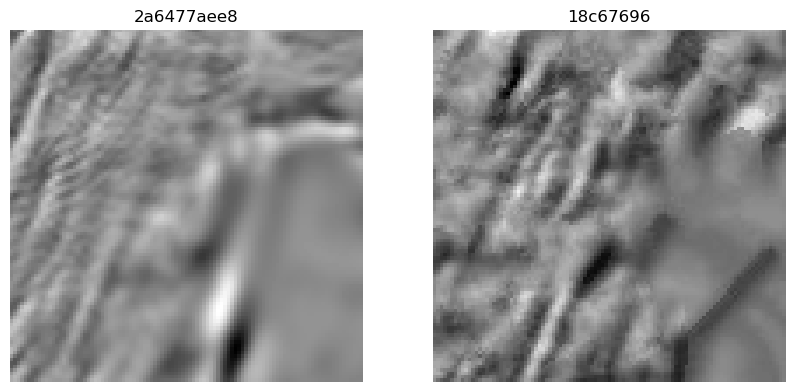

MSE        : 971.1281246936575
LBP T Dist: 0.0784029783406508
DSSIM      : 0.3736453291306366


In [42]:
images = [imageA,imageB]
titles = [sourcename, sinName]
pm.showImages(images=images, imagesTitle=titles,size=(10,10)) 

# compute the MSE between the two images
m = mse(imageA, imageB)
# compute the DSSIM between the two images
s = dssim(imageA, imageB)


# print(f"Old DSSIM  : {oldssim}")  # Old DSSIM is not used in the current code

# compute LBP tile distance
lbp_tile_dist = lbp_tile_distance(imageA, imageB)

print(f"MSE        : {m}")
print(f"LBP T Dist: {lbp_tile_dist}")
print(f"DSSIM      : {s}")


In [6]:
dist = lbp_tile_distance(imageA, imageB)
print(f"LBP tile distance: {dist}")


LBP tile distance: 0.0784029783406508


# Leitura de csv para comparação de imagens

In [15]:
import pandas as pd
import cv2
import numpy as np
from metrics import mse, dssim, lbp_tile_distance
import suport.patchesMethods as pm
import matplotlib.pyplot as plt
import os

In [16]:
#desenhar um bloxplot com os valores de mse, ssim e lbp_distance
def boxplot(nomeOriginal, mse_values, ssim_values, lbp_distances):
    numsamples = len(mse_values)
    #titulo da figura
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.boxplot(mse_values)
    plt.title('MSE ')
    plt.subplot(1, 3, 2)
    plt.boxplot(lbp_distances)
    plt.title('LBP Distance ')
    plt.subplot(1, 3, 3)
    plt.boxplot(ssim_values)
    plt.title('DSSIM')
    plt.suptitle(f'{nomeOriginal} - {numsamples} samples', fontsize=16)
    plt.tight_layout()

In [17]:
#calcule valores mínimos, q1, q2, mediana, q3 e máximo
def statistics(values):
    n = len(values)
    if n == 0:
        print("No values to calculate statistics.")
        return None, None, None, None, None, None
    min = np.min(values)
    q1 = np.percentile(values, 25)
    q2 = np.median(values)
    q3 = np.percentile(values, 75)
    max = np.max(values)
    mean = np.mean(values)
    print(f"   {min:.2f}, {q1:.2f}, {q2:.2f}, {q3:.2f}, {max:.2f}, {mean:.2f}")
    return n, min, q1, q2, q3, max, mean


In [47]:
# Carregar o arquivo CSV com os caminhos das imagens
df_imgs = pd.read_csv('result\\sintese.csv', sep=';' , header=None)

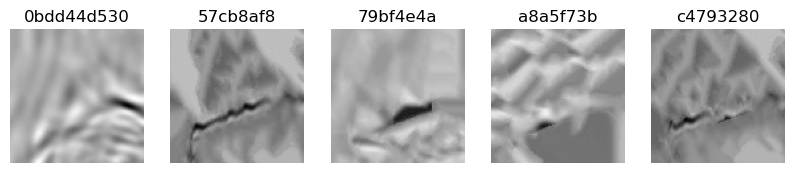

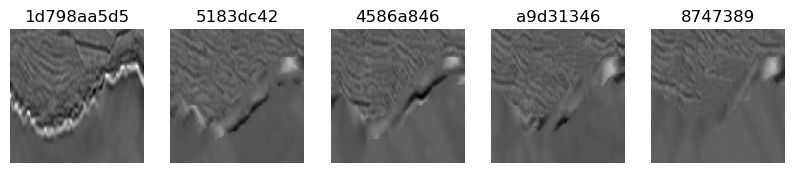

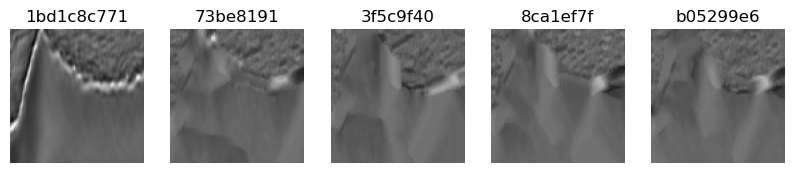

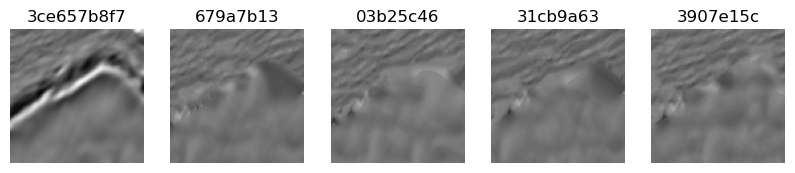

In [36]:
# mostre somente os 5 primeiros valores de cada linha df_imgs sem o numero de indice
# acrencente a extenção .png ao primeiro valor e jpg ao demais valores
# carregue com cv2.imread cada uma das imagens a partir do diretorio results e coloque na lista imgs
# verifique se a leitura foi bem sucedida
imgs = []
for i, row in df_imgs.iterrows():
    filename = f"tgs_salt/{row.iloc[0]}.png"
    if os.path.exists(filename):
        imgs.append(cv2.imread(filename))
    else:
        print(f"Arquivo não encontrado: {filename}")
    for val in row.iloc[1:5].values:
        filename = f"result/{val}.jpg"
        if os.path.exists(filename):
            imgs.append(cv2.imread(filename))
        else:
            print(f"Arquivo não encontrado: {filename}")
    pm.showImages(images=imgs, imagesTitle=row.iloc[0:5].values,size=(10,10))
    imgs = []  # Limpar a lista para a próxima iteração



In [1]:
import os
import sys
import pandas as pd


In [38]:
#liste todos arqvuios run_metrics csv na pasta result e seus subdiretorios
arquivos = []
for root, dirs, files in os.walk('result'):
    for f in files:
        if f.startswith('run_metrics') and f.endswith('.csv'):
            arquivos.append(os.path.join(root, f))
print(arquivos)

['result\\old\\run_metrics.csv', 'result\\old\\run_metrics_e7057b15.csv', 'result\\run_20250913_155213_a3ad2df0\\run_metrics_8ac7ff10.csv', 'result\\run_20250913_162222_3728be04\\run_metrics_c8bb00bd.csv', 'result\\run_20250913_190017_3eccce87\\run_metrics_1c1414c4.csv', 'result\\run_20250913_205605_b31cd115\\run_metrics_19bd129f.csv', 'result\\run_20250913_211128_835547f6\\run_metrics_440d34e4.csv']


In [39]:
#retire os dois primeiros da lista
arquivos = arquivos[2:]
arquivos

['result\\run_20250913_155213_a3ad2df0\\run_metrics_8ac7ff10.csv',
 'result\\run_20250913_162222_3728be04\\run_metrics_c8bb00bd.csv',
 'result\\run_20250913_190017_3eccce87\\run_metrics_1c1414c4.csv',
 'result\\run_20250913_205605_b31cd115\\run_metrics_19bd129f.csv',
 'result\\run_20250913_211128_835547f6\\run_metrics_440d34e4.csv']

In [40]:
# Carregar e concatenar todos os arquivos CSV em um único DataFrame
df_list = []
for arquivo in arquivos:
    df_temp = pd.read_csv(arquivo, sep=';', comment='#')
    df_list.append(df_temp)
df = pd.concat(df_list, ignore_index=True)


In [41]:
df

,iteration,output_file,time_sec,mse,dssim,lbp_distance
0,1,result\run_20250913_155213_a3ad2df0\7ed82e9d.jpg,27.187074,1006.754632,0.355690,0.112762
1,2,result\run_20250913_155213_a3ad2df0\063f0ff7.jpg,27.695558,992.387511,0.337736,0.059733
2,3,result\run_20250913_155213_a3ad2df0\e65c287b.jpg,26.272383,1072.829919,0.347777,0.061106
3,4,result\run_20250913_155213_a3ad2df0\341bd7d4.jpg,26.582937,1103.981178,0.342811,0.087936
4,5,result\run_20250913_155213_a3ad2df0\4a6026f6.jpg,25.976426,1149.498579,0.363417,0.097283
...,...,...,...,...,...,...
226,46,result\run_20250913_211128_835547f6\172a8939.jpg,16.454694,538.824331,0.276191,0.087247
227,47,result\run_20250913_211128_835547f6\108a8e0c.jpg,16.545090,511.830605,0.264426,0.092481
228,48,result\run_20250913_211128_835547f6\9d9dc147.jpg,16.445557,587.105382,0.288188,0.069877
229,49,result\run_20250913_211128_835547f6\e6682392.jpg,16.389119,557.453975,0.280280,0.088915


In [23]:
# Seleciona um arquivo de métricas
# Caso já existam caminhos absolutos em 'arquivos', NÃO prefixar com 'result'.
# Se quiser pegar sempre o mais recente: ordenar por mtime.
import os, time

if not arquivos:
    raise RuntimeError("Lista 'arquivos' está vazia. Execute a célula que popula 'arquivos' antes.")

# Ordena por data de modificação (mais recente primeiro)
arquivos_ordenados = sorted(arquivos, key=lambda p: os.path.getmtime(p), reverse=True)

# Escolhe o primeiro (mais recente) ou um índice específico
indice = 0  # altere para outro índice se quiser
meuarquivo = arquivos_ordenados[indice]

# Garante que é caminho existente
if not os.path.exists(meuarquivo):
    raise FileNotFoundError(f"O arquivo {meuarquivo} não foi encontrado.")
print(f"metrics CSV selecionado: {meuarquivo}")

metrics CSV selecionado: result\run_20250913_211128_835547f6\run_metrics_440d34e4.csv


In [24]:
# Lê ignorando linhas de comentário (começam com #) e usando separador ponto-e-vírgula
df = pd.read_csv(meuarquivo, sep=';', comment='#')

In [42]:
expected_cols = ['iteration', 'output_file', 'time_sec', 'mse', 'dssim', 'lbp_distance']
missing = [c for c in expected_cols if c not in df.columns]
if missing:
    print('Colunas presentes no arquivo:', list(df.columns))
    raise ValueError(f'Colunas esperadas ausentes: {missing}')
else:
    print('Todas as colunas esperadas estão presentes.')

Todas as colunas esperadas estão presentes.


In [43]:
# Garante tipos numéricos onde necessário
numeric_cols = ['time_sec', 'mse', 'dssim', 'lbp_distance']
for c in numeric_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

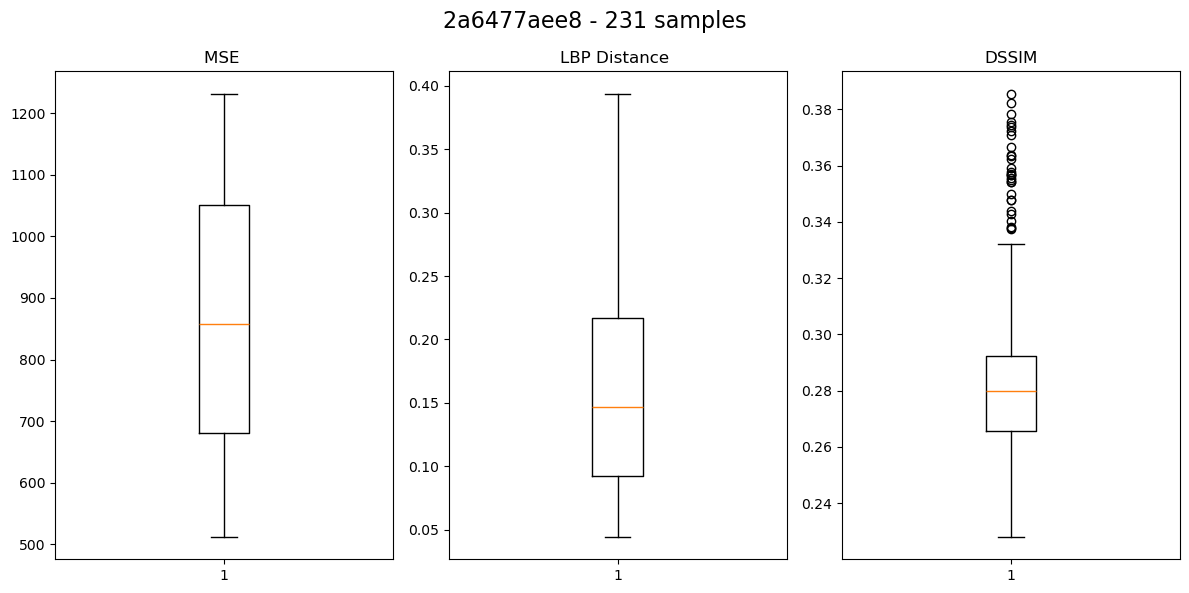

In [44]:
boxplot('2a6477aee8', df['mse'], df['dssim'], df['lbp_distance'])

In [8]:
# Calcula estatísticas
stats_df = pd.DataFrame({
    'min': df[numeric_cols].min(),
    'Q1': df[numeric_cols].quantile(0.25),
    'median': df[numeric_cols].median(),
    'Q3': df[numeric_cols].quantile(0.75),
    'max': df[numeric_cols].max(),
    'mean': df[numeric_cols].mean(),
    'std': df[numeric_cols].std(),
    'count': df[numeric_cols].count()
})

print('\nEstatísticas descritivas por métrica:')
print(stats_df)



Estatísticas descritivas por métrica:
                     min          Q1       median           Q3          max  \
time_sec       24.822575   26.206053    26.878693    27.070121    27.695558   
mse           842.586609  996.966425  1058.259876  1131.357269  1231.950789   
dssim           0.332100    0.347850     0.356595     0.368704     0.385665   
lbp_distance    0.050387    0.079733     0.092007     0.097789     0.119355   

                     mean         std  count  
time_sec        26.590492    0.753758     31  
mse           1057.239505  100.992360     31  
dssim            0.357852    0.014219     31  
lbp_distance     0.089857    0.019016     31  


In [ ]:

# Salva ao lado do CSV original
out_dir = os.path.dirname(meuarquivo)
out_path = os.path.join(out_dir, 'summary_stats.csv')
stats_df.to_csv(out_path, sep=';', float_format='%.6f')
print(f'Arquivo de estatísticas salvo em: {out_path}')
